In [1]:
from google.colab import files

uploaded = files.upload()

Saving benefits.csv to benefits.csv
Saving companies.csv to companies.csv
Saving company_industries.csv to company_industries.csv
Saving company_specialities.csv to company_specialities.csv
Saving employee_counts.csv to employee_counts.csv
Saving industries.csv to industries.csv
Saving job_industries.csv to job_industries.csv
Saving job_skills.csv to job_skills.csv
Saving postings.csv to postings.csv
Saving salaries.csv to salaries.csv
Saving skills.csv to skills.csv


In [3]:
import pandas as pd
datasets = {
    'employee_counts': pd.read_csv(r'/content/employee_counts.csv'),
    'companies': pd.read_csv(r'/content/companies.csv'),
    'company_industries':  pd.read_csv(r'/content/company_industries.csv'),
    'company_specialities':  pd.read_csv(r'/content/company_specialities.csv'),
    'benefits':  pd.read_csv(r'/content/benefits.csv'),
    'job_industries':  pd.read_csv(r'/content/job_industries.csv'),
    'job_skills': pd.read_csv(r'/content/job_skills.csv'),
    'salaries':  pd.read_csv(r'/content/salaries.csv'),
    'industries':  pd.read_csv(r'/content/industries.csv'),
    'skills':  pd.read_csv(r'/content/skills.csv'),
    'postings':  pd.read_csv(r'/content/postings.csv')

}

In [4]:
for name, df in datasets.items():
    print(f"Dataset: {name}")
    print(df.info(), '\n')
    print(df.head(), '\n')
    print('-' * 80)


Dataset: employee_counts
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35787 entries, 0 to 35786
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   company_id      35787 non-null  int64
 1   employee_count  35787 non-null  int64
 2   follower_count  35787 non-null  int64
 3   time_recorded   35787 non-null  int64
dtypes: int64(4)
memory usage: 1.1 MB
None 

   company_id  employee_count  follower_count  time_recorded
0      391906             186           32508     1712346173
1    22292832             311            4471     1712346173
2       20300            1053            6554     1712346173
3     3570660             383           35241     1712346173
4      878353              52           26397     1712346173 

--------------------------------------------------------------------------------
Dataset: companies
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24473 entries, 0 to 24472
Data columns (total 

In [5]:
# Check for missing values in all datasets
missing_values = {name: df.isnull().sum() for name, df in datasets.items()}
print(missing_values)

{'employee_counts': company_id        0
employee_count    0
follower_count    0
time_recorded     0
dtype: int64, 'companies': company_id         0
name               1
description      297
company_size    2774
state             22
country            0
city               1
zip_code          28
address           22
url                0
dtype: int64, 'company_industries': company_id    0
industry      0
dtype: int64, 'company_specialities': company_id    0
speciality    0
dtype: int64, 'benefits': job_id      0
inferred    0
type        0
dtype: int64, 'job_industries': job_id         0
industry_id    0
dtype: int64, 'job_skills': job_id       0
skill_abr    0
dtype: int64, 'salaries': salary_id                0
job_id                   0
max_salary            6838
med_salary           33947
min_salary            6838
pay_period               0
currency                 0
compensation_type        0
dtype: int64, 'industries': industry_id       0
industry_name    34
dtype: int64, 'skills':

In [11]:
# Handle missing values in the companies dataset
companies = datasets['companies']
companies.dropna(subset=['name'], inplace=True)
companies['description'].fillna('No description available', inplace=True)
companies['company_size'].fillna(companies['company_size'].median(), inplace=True)
companies['state'].fillna(companies['state'].mode()[0], inplace=True)
companies.dropna(subset=['city'], inplace=True)
companies['zip_code'].fillna('00000', inplace=True)
companies['address'].fillna('No address available', inplace=True)

# Handle missing values in the salaries dataset
salaries = datasets['salaries']
salaries['max_salary'].fillna(salaries['max_salary'].median(), inplace=True)
salaries['med_salary'].fillna(salaries['med_salary'].median(), inplace=True)
salaries['min_salary'].fillna(salaries['min_salary'].median(), inplace=True)

# Handle missing values in the postings dataset
postings = datasets['postings']
postings.dropna(subset=['company_name'], inplace=True)
postings['description'].fillna('No description available', inplace=True)
postings['max_salary'].fillna(postings['max_salary'].median(), inplace=True)
postings['med_salary'].fillna(postings['med_salary'].median(), inplace=True)
postings['min_salary'].fillna(postings['min_salary'].median(), inplace=True)
postings['pay_period'].fillna(postings['pay_period'].mode()[0], inplace=True)
postings.dropna(subset=['company_id'], inplace=True)
postings['views'].fillna(postings['views'].median(), inplace=True)
postings['applies'].fillna(postings['applies'].median(), inplace=True)
postings['remote_allowed'].fillna(postings['remote_allowed'].mode()[0], inplace=True)
postings['application_url'].fillna('No application URL', inplace=True)
postings['formatted_experience_level'].fillna(postings['formatted_experience_level'].mode()[0], inplace=True)
postings['skills_desc'].fillna('No skills listed', inplace=True)
postings['posting_domain'].fillna('No domain', inplace=True)
postings['currency'].fillna(postings['currency'].mode()[0], inplace=True)
postings['compensation_type'].fillna(postings['compensation_type'].mode()[0], inplace=True)

# Handle missing values in the industries dataset
industries = datasets['industries']
industries['industry_name'].fillna('Unknown Industry', inplace=True)

# Display the first few rows of the postings dataset
print(postings.head())


      job_id               company_name  \
0     921716      Corcoran Sawyer Smith   
2   10998357     The National Exemplar    
3   23221523     Abrams Fensterman, LLP   
5   91700727  Downtown Raleigh Alliance   
6  103254301                 Raw Cereal   

                                               title  \
0                              Marketing Coordinator   
2                        Assitant Restaurant Manager   
3  Senior Elder Law / Trusts and Estates Associat...   
5           Economic Development and Planning Intern   
6                                           Producer   

                                         description  max_salary pay_period  \
0  Job descriptionA leading real estate firm in N...        20.0     HOURLY   
2  The National Exemplar is accepting application...     65000.0     YEARLY   
3  Senior Associate Attorney - Elder Law / Trusts...    175000.0     YEARLY   
5  Job summary:The Economic Development & Plannin...        20.0     HOURLY   
6  Compan

In [15]:
# Combine company-related datasets
company_details = datasets['companies']
company_details = company_details.merge(datasets['company_industries'], on='company_id', how='left')
company_details = company_details.merge(datasets['company_specialities'], on='company_id', how='left')
company_details = company_details.merge(datasets['employee_counts'], on='company_id', how='left')

# Display the first few rows of the combined company dataset
print(company_details.head())


   company_id name                                        description  \
0        1009  IBM  At IBM, we do more than work. We create. We cr...   
1        1009  IBM  At IBM, we do more than work. We create. We cr...   
2        1009  IBM  At IBM, we do more than work. We create. We cr...   
3        1009  IBM  At IBM, we do more than work. We create. We cr...   
4        1009  IBM  At IBM, we do more than work. We create. We cr...   

   company_size state country              city zip_code  \
0           7.0    NY      US  Armonk, New York    10504   
1           7.0    NY      US  Armonk, New York    10504   
2           7.0    NY      US  Armonk, New York    10504   
3           7.0    NY      US  Armonk, New York    10504   
4           7.0    NY      US  Armonk, New York    10504   

                                 address  \
0  International Business Machines Corp.   
1  International Business Machines Corp.   
2  International Business Machines Corp.   
3  International Busines

In [16]:
# Merge job-related datasets
job_benefits = datasets['benefits']
merged_job_data = job_benefits.merge(datasets['job_industries'], on='job_id', how='left')
merged_job_data = merged_job_data.merge(datasets['job_skills'], on='job_id', how='left')
merged_job_data = merged_job_data.merge(datasets['salaries'], on='job_id', how='left')

# Display the first few rows of the merged job dataset
print(merged_job_data.head())


       job_id  inferred                     type  industry_id skill_abr  \
0  3887473071         0        Medical insurance         48.0      SALE   
1  3887473071         0         Vision insurance         48.0      SALE   
2  3887473071         0         Dental insurance         48.0      SALE   
3  3887473071         0                   401(k)         48.0      SALE   
4  3887473071         0  Student loan assistance         48.0      SALE   

   salary_id  max_salary  med_salary  min_salary pay_period currency  \
0        NaN         NaN         NaN         NaN        NaN      NaN   
1        NaN         NaN         NaN         NaN        NaN      NaN   
2        NaN         NaN         NaN         NaN        NaN      NaN   
3        NaN         NaN         NaN         NaN        NaN      NaN   
4        NaN         NaN         NaN         NaN        NaN      NaN   

  compensation_type  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4     

In [17]:
# Merge postings with company and job data in chunks
combined_data = datasets['postings']
combined_data = combined_data.merge(company_details, on='company_id', how='left', suffixes=('_post', '_comp'))
combined_data = combined_data.merge(merged_job_data, on='job_id', how='left', suffixes=('', '_jb'))

# Display the size of the combined dataset
print(f"Combined Data Shape: {combined_data.shape}")


Combined Data Shape: (7268019, 53)


<ipython-input-19-cb36a51ccdf5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_job_titles.index, y=top_job_titles.values, palette='viridis')


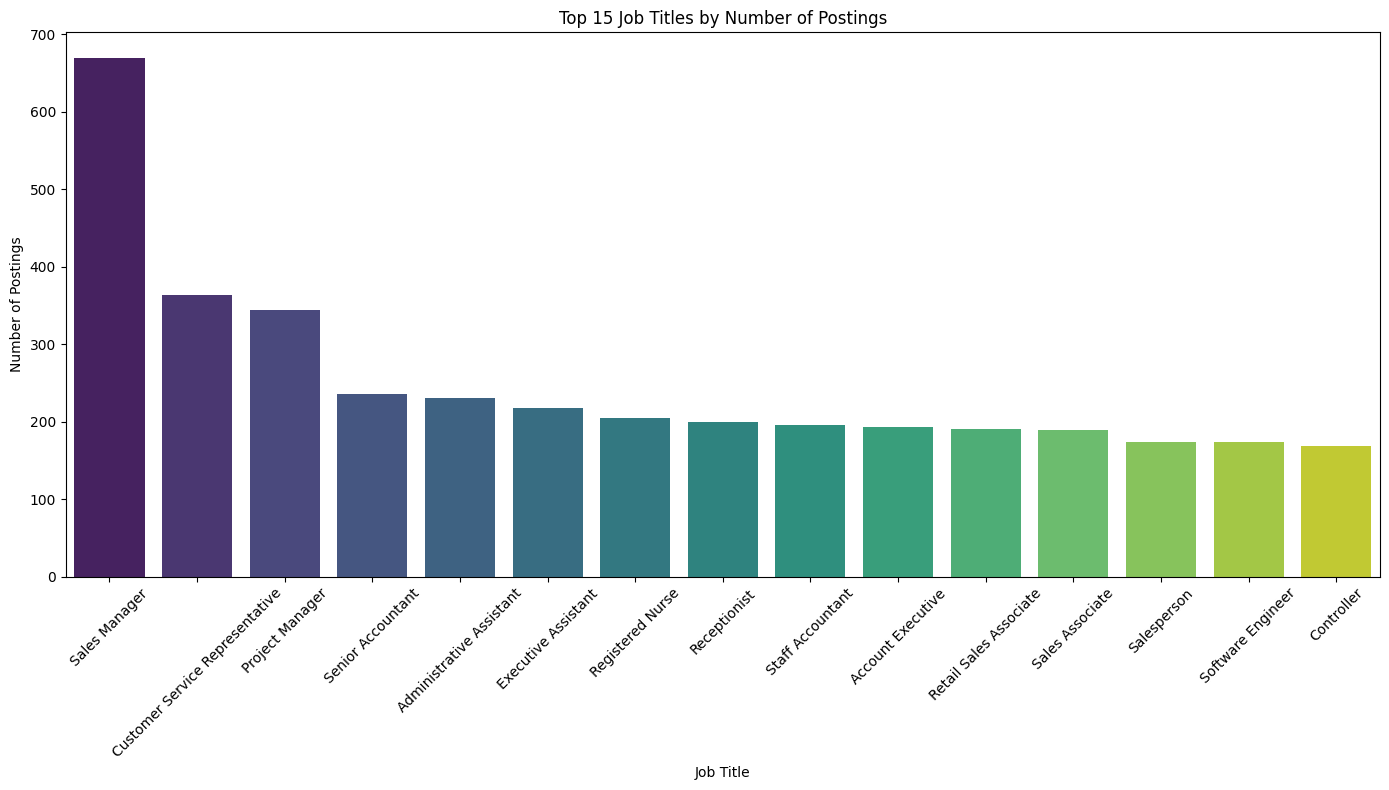

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of job postings by title
plt.figure(figsize=(14, 8))
top_job_titles = postings['title'].value_counts().nlargest(15)
sns.barplot(x=top_job_titles.index, y=top_job_titles.values, palette='viridis')
plt.title('Top 15 Job Titles by Number of Postings')
plt.xlabel('Job Title')
plt.ylabel('Number of Postings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



<ipython-input-20-483dcbd2904a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette='magma')


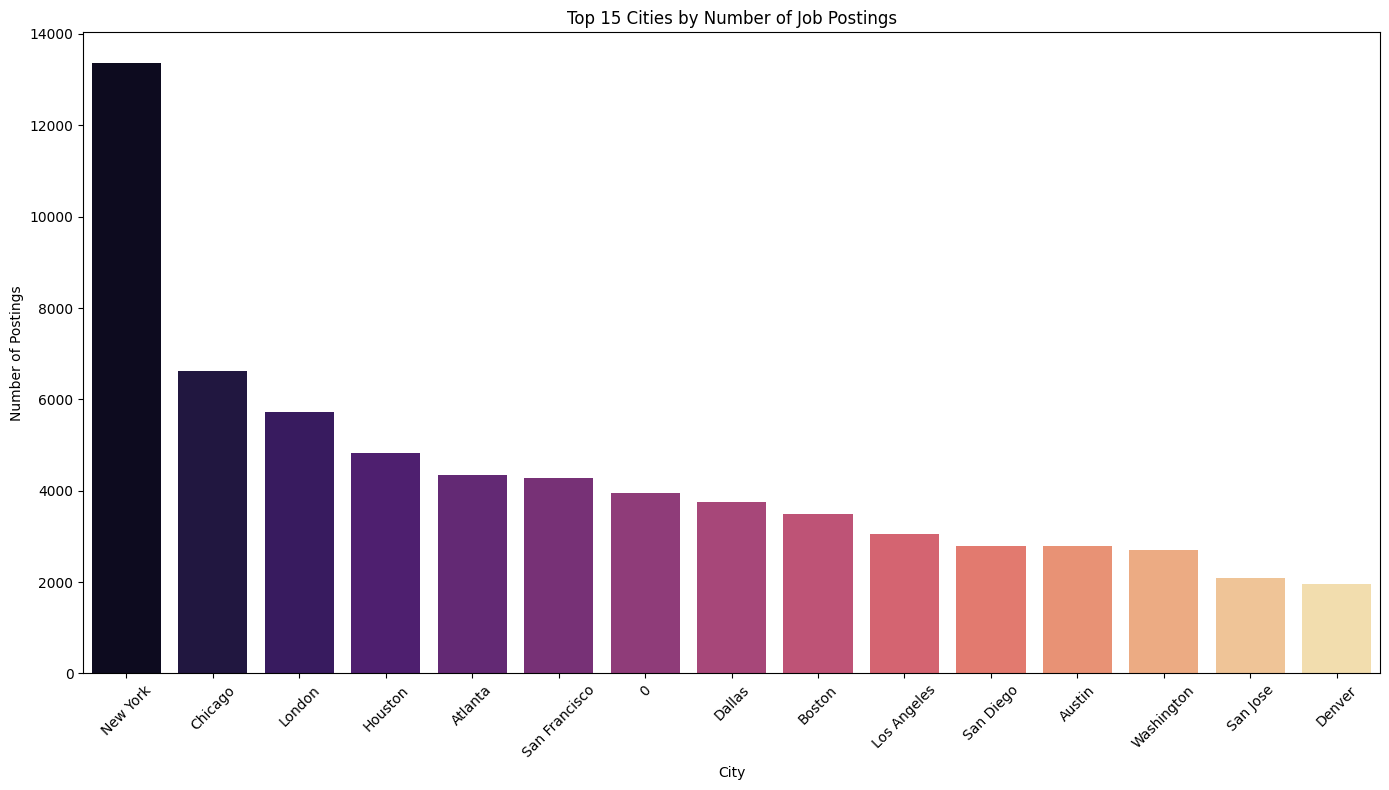

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of job postings by city
plt.figure(figsize=(14, 8))
top_cities = company_data['city'].value_counts().nlargest(15)
sns.barplot(x=top_cities.index, y=top_cities.values, palette='magma')
plt.title('Top 15 Cities by Number of Job Postings')
plt.xlabel('City')
plt.ylabel('Number of Postings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-22-e0fc8fbd1bbf>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=company_size_distribution.index, y=company_size_distribution.values, palette='coolwarm')


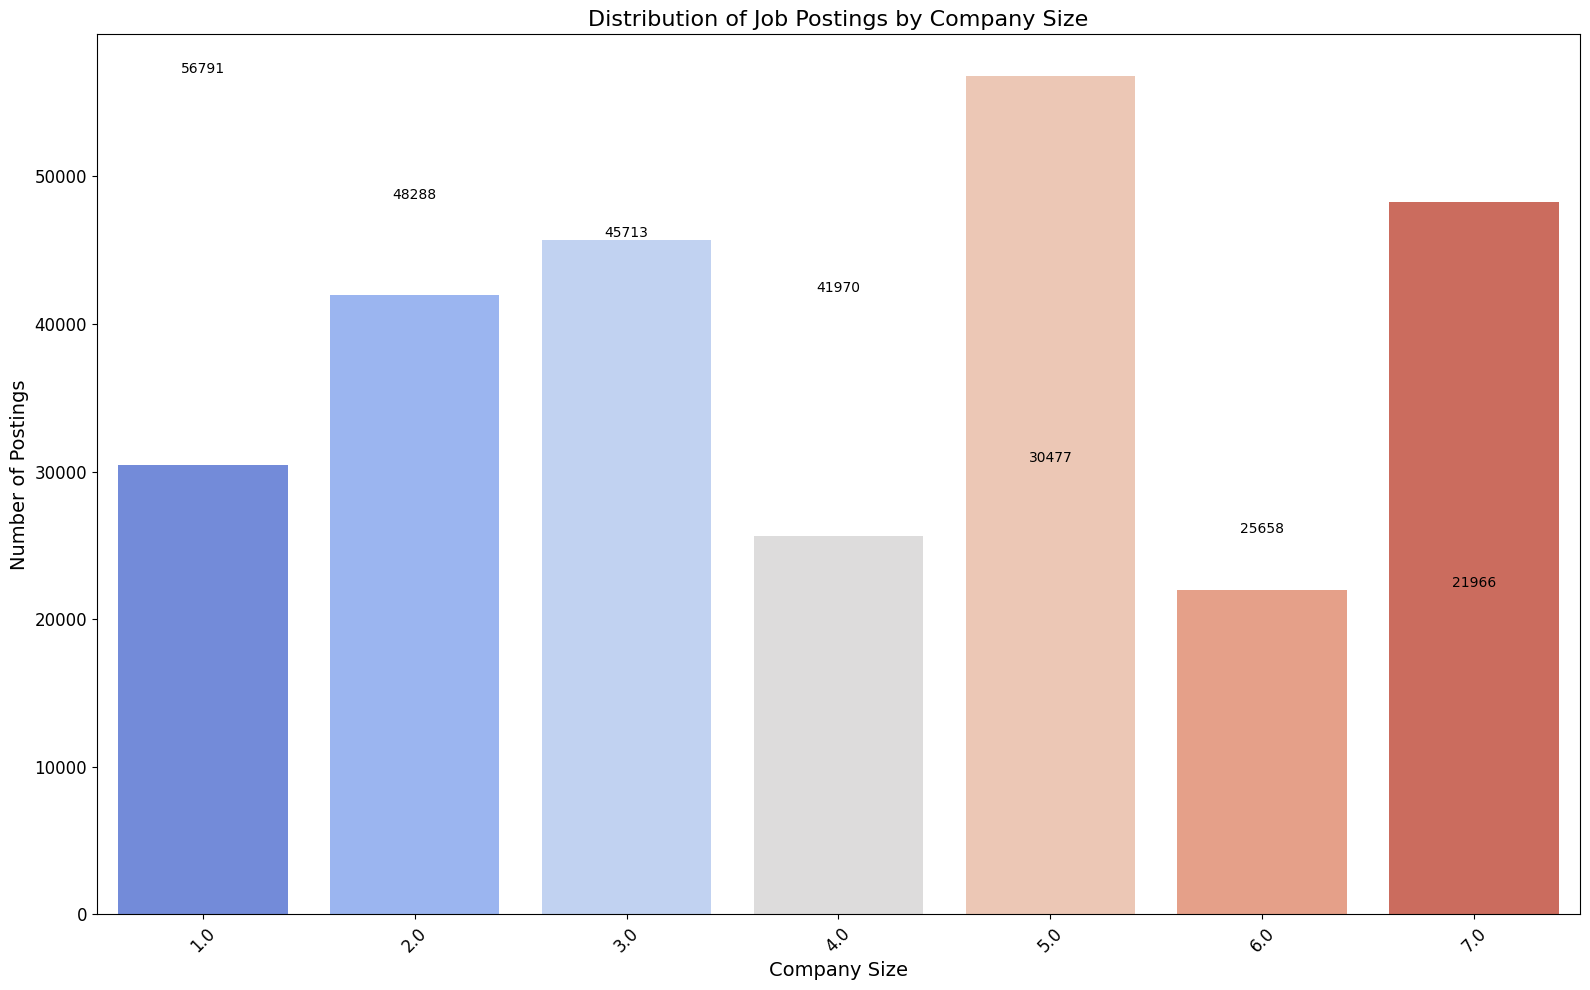

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of job postings by company size
plt.figure(figsize=(16, 10))
company_size_distribution = company_data['company_size'].value_counts().sort_values(ascending=False)  # Ensure it's sorted

# Create the bar plot with a custom color palette and add data labels
sns.barplot(x=company_size_distribution.index, y=company_size_distribution.values, palette='coolwarm')
plt.title('Distribution of Job Postings by Company Size', fontsize=16)
plt.xlabel('Company Size', fontsize=14)
plt.ylabel('Number of Postings', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Adding data labels
for index, value in enumerate(company_size_distribution.values):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


<ipython-input-24-7c896fd4b426>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_type_distribution.index, y=job_type_distribution.values, palette='Set2')


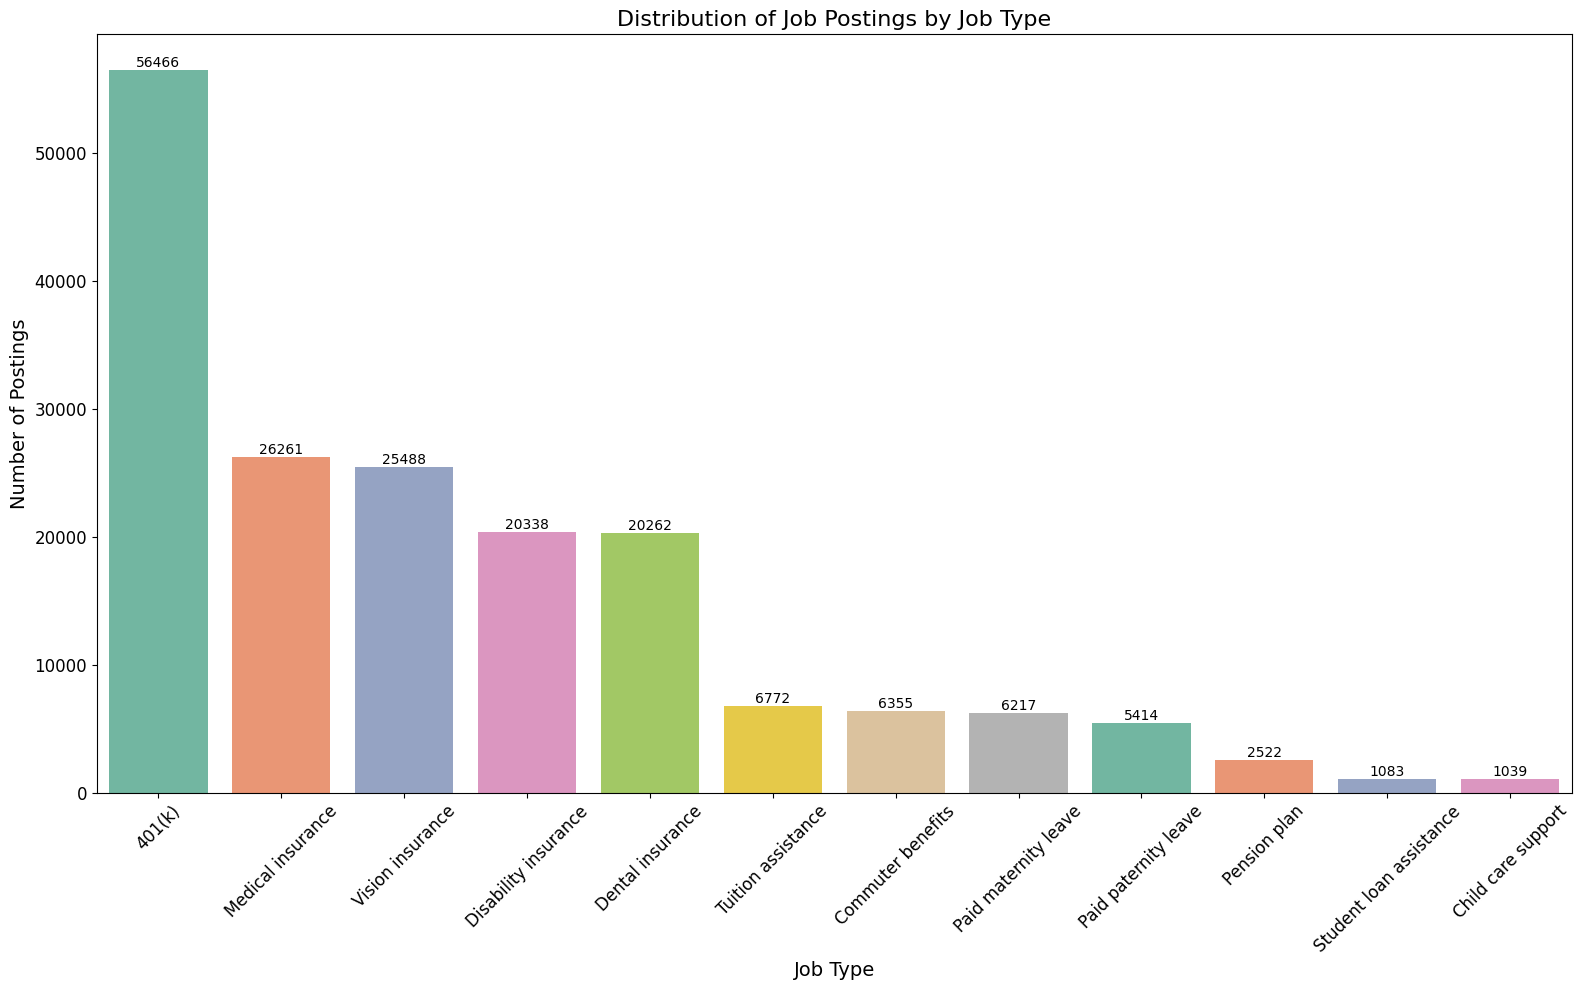

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define job_data by merging relevant datasets
benefits = datasets['benefits']
job_data = benefits.merge(datasets['job_industries'], on='job_id', how='left')
job_data = job_data.merge(datasets['job_skills'], on='job_id', how='left')
job_data = job_data.merge(datasets['salaries'], on='job_id', how='left')

# Distribution of job postings by job type
plt.figure(figsize=(16, 10))
job_type_distribution = job_data['type'].value_counts().sort_values(ascending=False)  # Ensure it's sorted

# Create the bar plot with a custom color palette and add data labels
sns.barplot(x=job_type_distribution.index, y=job_type_distribution.values, palette='Set2')
plt.title('Distribution of Job Postings by Job Type', fontsize=16)
plt.xlabel('Job Type', fontsize=14)
plt.ylabel('Number of Postings', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Adding data labels
for index, value in enumerate(job_type_distribution.values):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


<ipython-input-25-a42f95d30e65>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skills.index, y=top_skills.values, palette='Spectral')


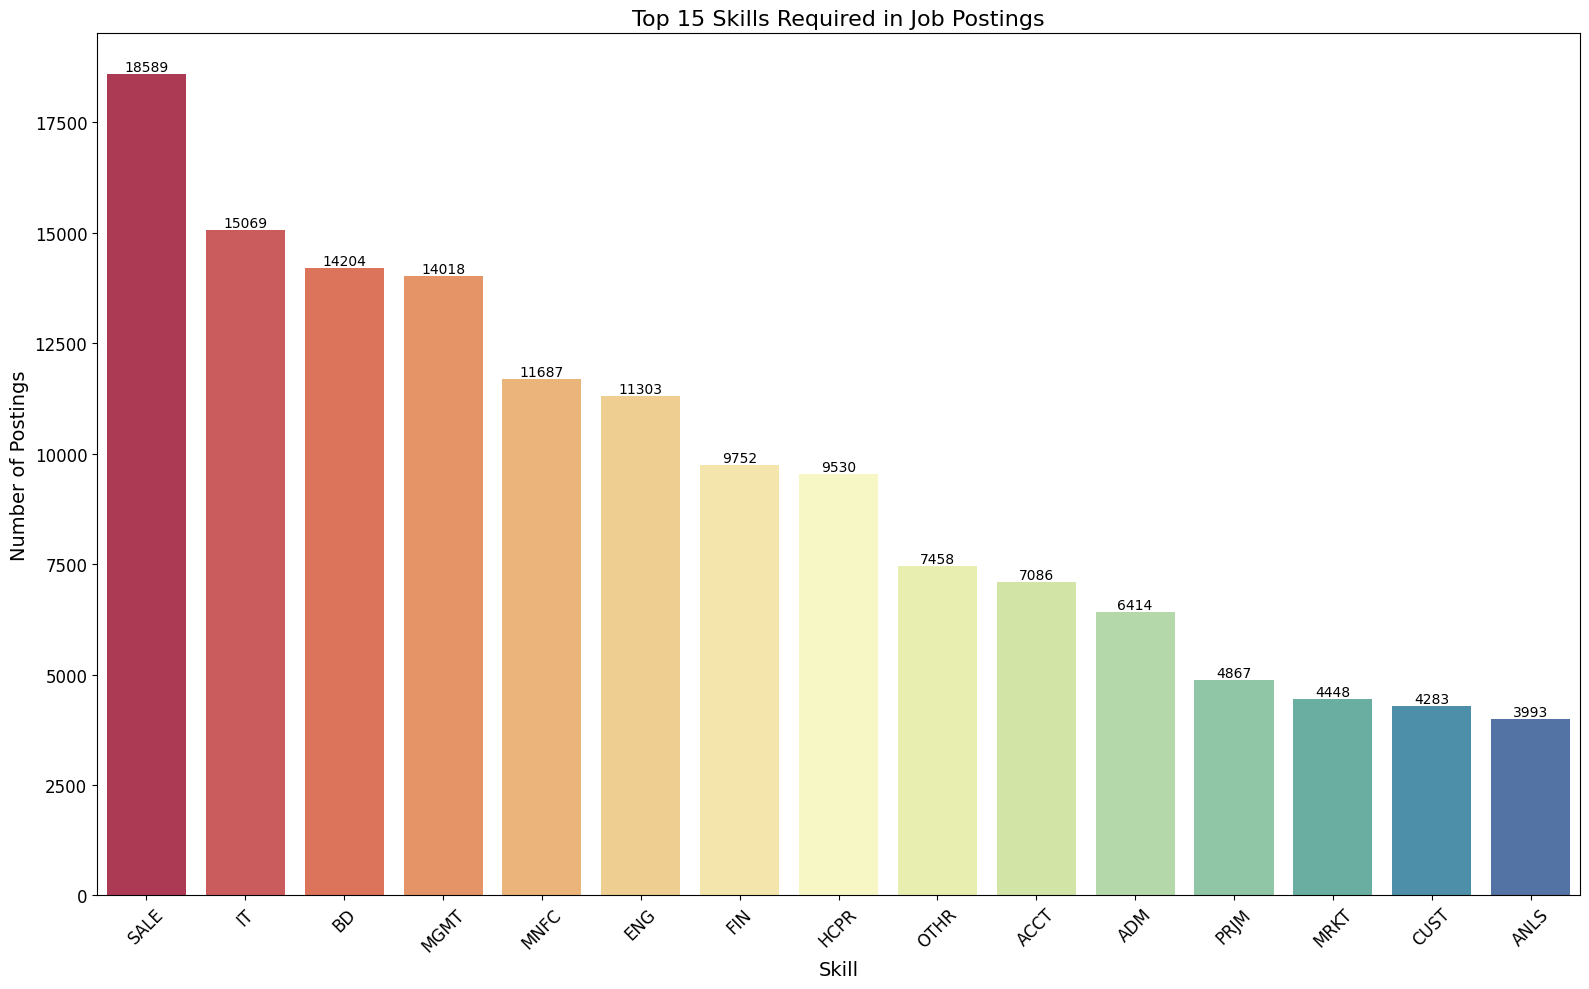

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Most common skills in job postings
plt.figure(figsize=(16, 10))
top_skills = job_data['skill_abr'].value_counts().nlargest(15)

# Create the bar plot with a custom color palette and add data labels
sns.barplot(x=top_skills.index, y=top_skills.values, palette='Spectral')
plt.title('Top 15 Skills Required in Job Postings', fontsize=16)
plt.xlabel('Skill', fontsize=14)
plt.ylabel('Number of Postings', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Adding data labels
for index, value in enumerate(top_skills.values):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


<ipython-input-26-591c46f1bad8>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=experience_level_distribution.index, y=experience_level_distribution.values, palette='Blues')


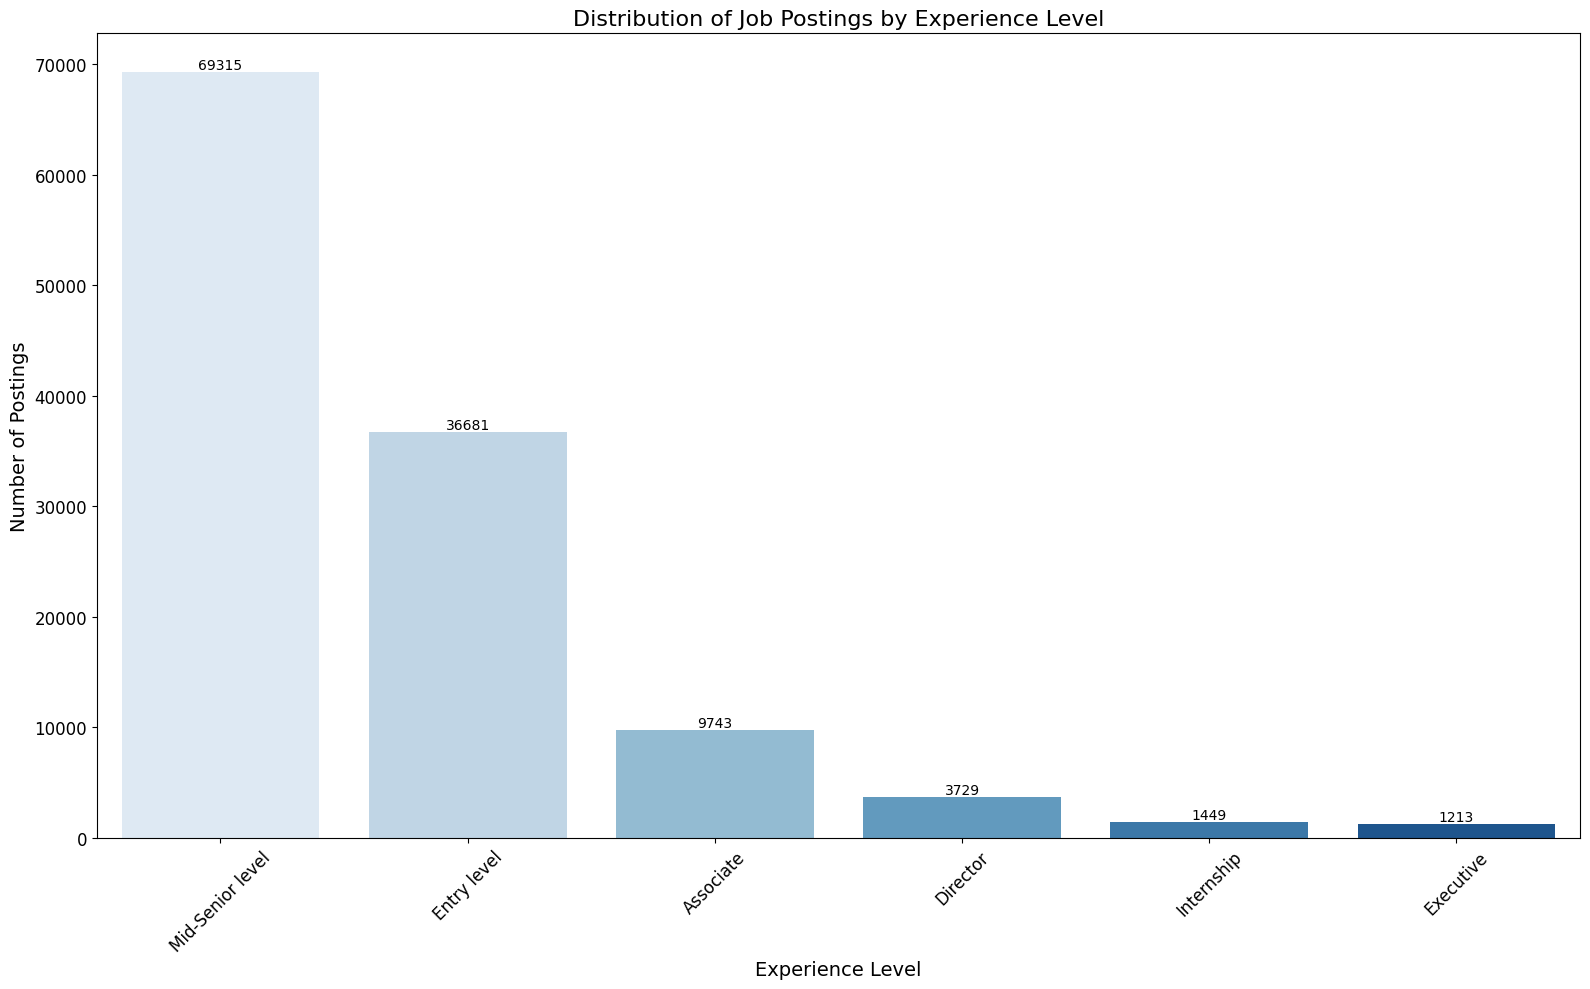

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of job postings by experience level
plt.figure(figsize=(16, 10))
experience_level_distribution = postings['formatted_experience_level'].value_counts().sort_values(ascending=False)  # Ensure it's sorted

# Create the bar plot with a custom color palette and add data labels
sns.barplot(x=experience_level_distribution.index, y=experience_level_distribution.values, palette='Blues')
plt.title('Distribution of Job Postings by Experience Level', fontsize=16)
plt.xlabel('Experience Level', fontsize=14)
plt.ylabel('Number of Postings', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Adding data labels
for index, value in enumerate(experience_level_distribution.values):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


<ipython-input-27-7e6f84871464>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='med_salary', data=job_data, palette='Pastel1')


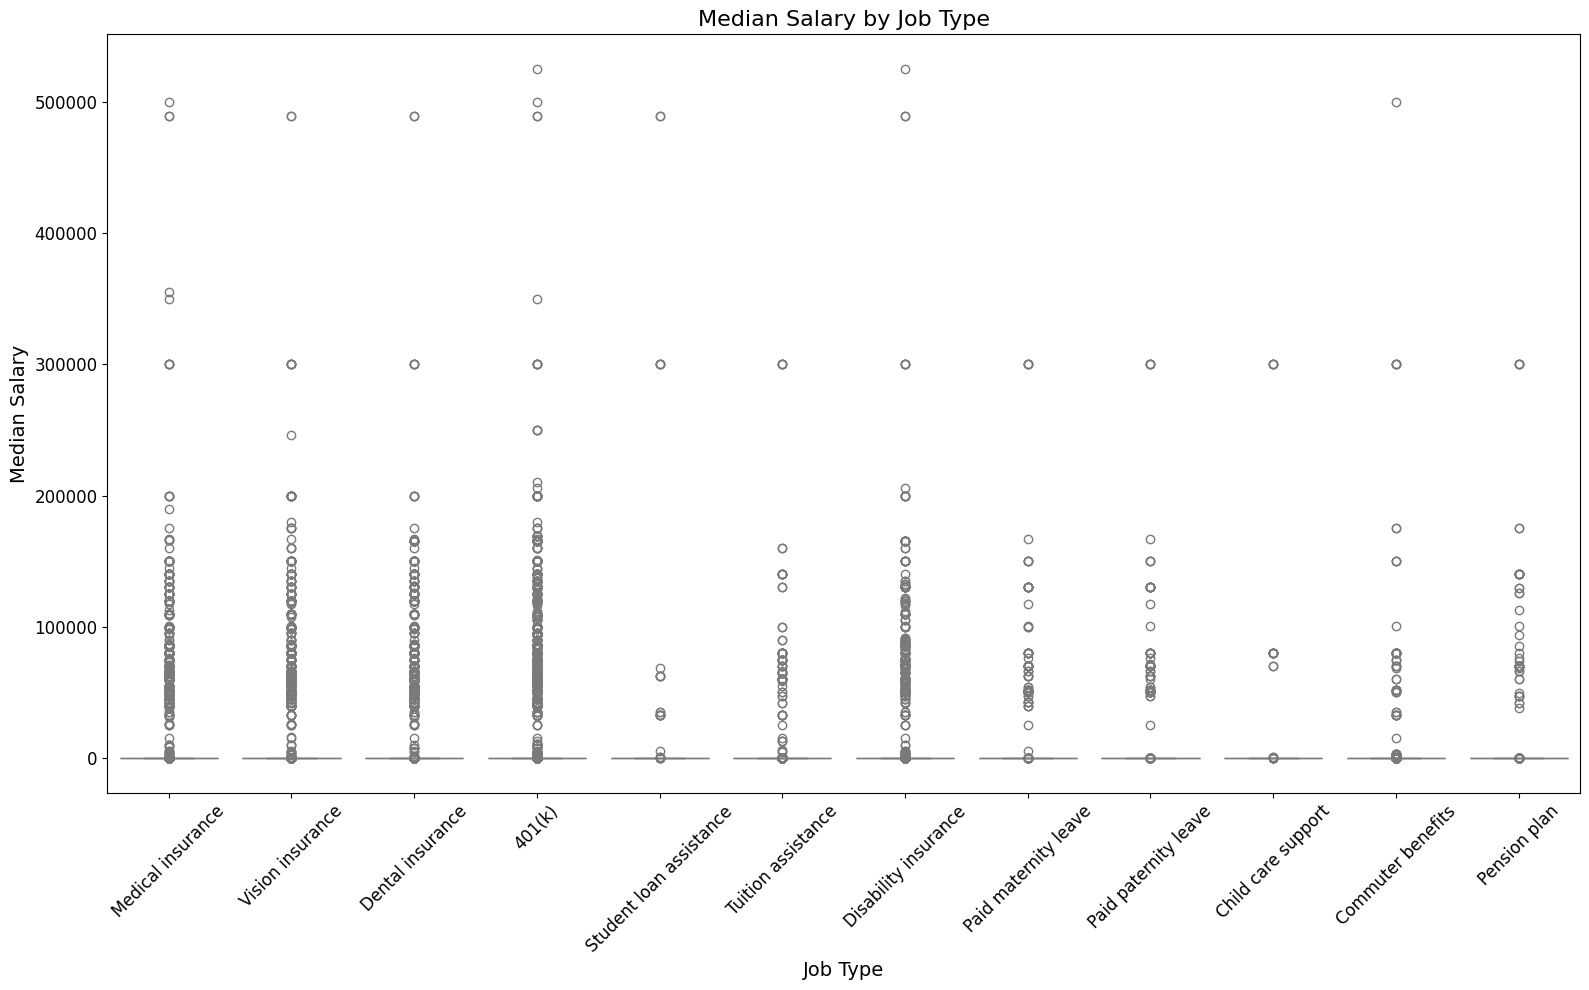

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Salary vs. job type
plt.figure(figsize=(16, 10))
sns.boxplot(x='type', y='med_salary', data=job_data, palette='Pastel1')
plt.title('Median Salary by Job Type', fontsize=16)
plt.xlabel('Job Type', fontsize=14)
plt.ylabel('Median Salary', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


<ipython-input-31-7acdc8cb022f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_industry_salary.index, y=avg_industry_salary.values, palette='viridis')


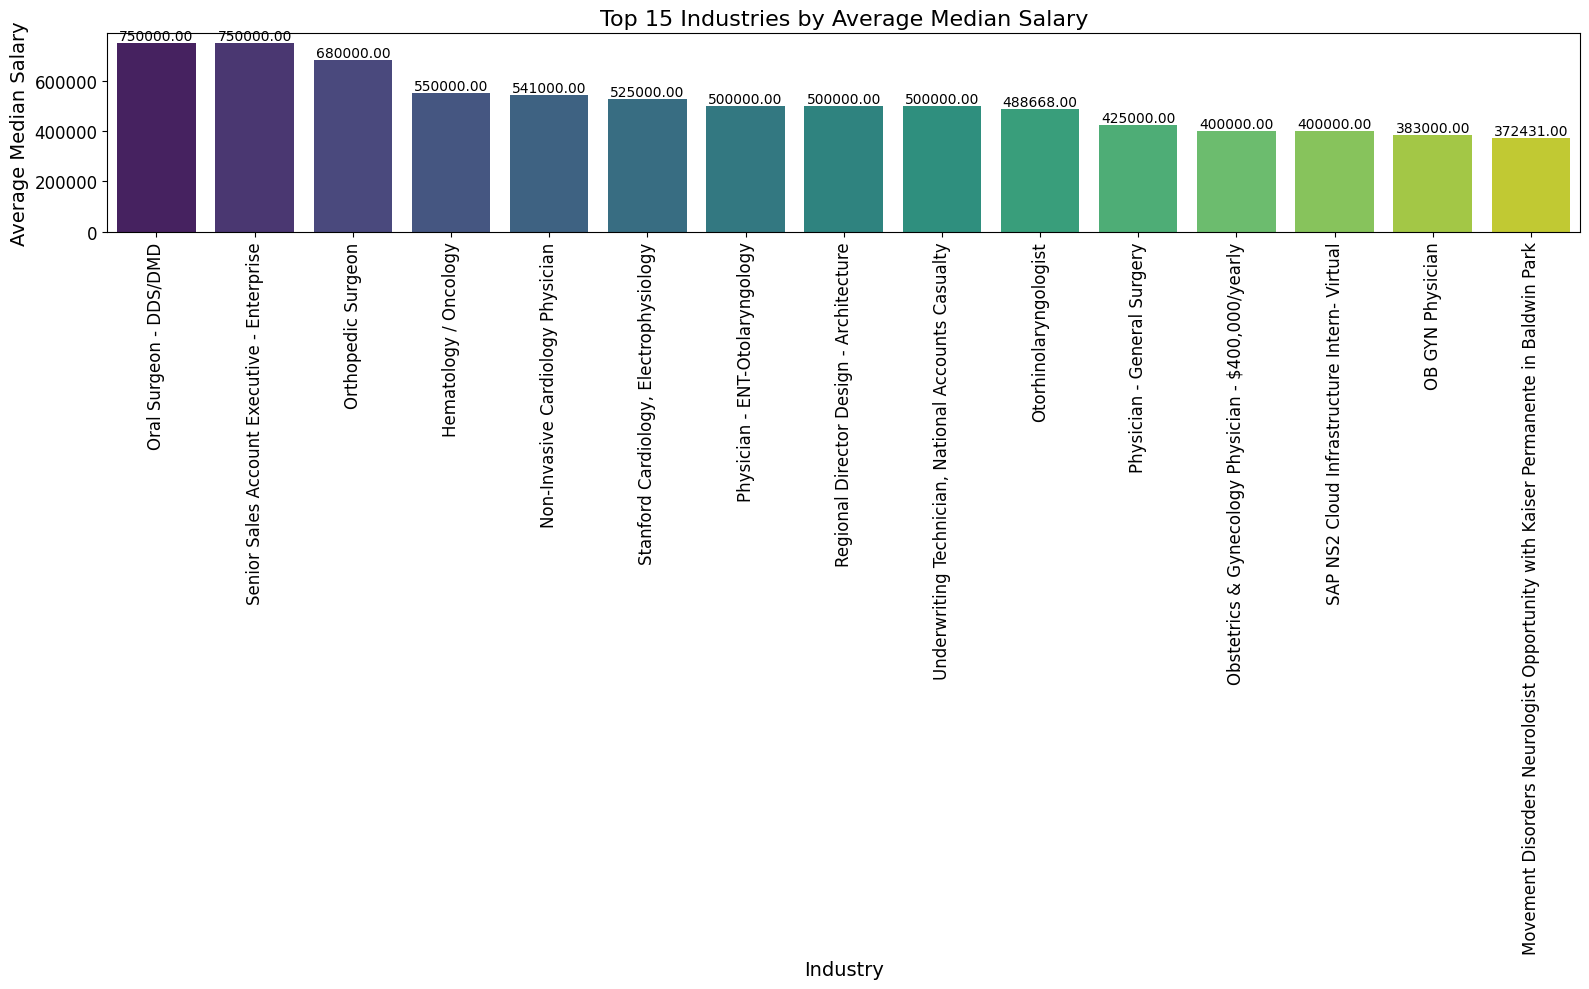

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Average salary by industry
avg_industry_salary = postings.groupby('title')['med_salary'].mean().nlargest(15).sort_values(ascending=False)
plt.figure(figsize=(16, 10))

# Create the bar plot with a custom color palette and add data labels
sns.barplot(x=avg_industry_salary.index, y=avg_industry_salary.values, palette='viridis')
plt.title('Top 15 Industries by Average Median Salary', fontsize=16)  # Larger font size for the title
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Average Median Salary', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

# Adding data labels
for index, value in enumerate(avg_industry_salary.values):
    plt.text(index, value, f"{value:.2f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


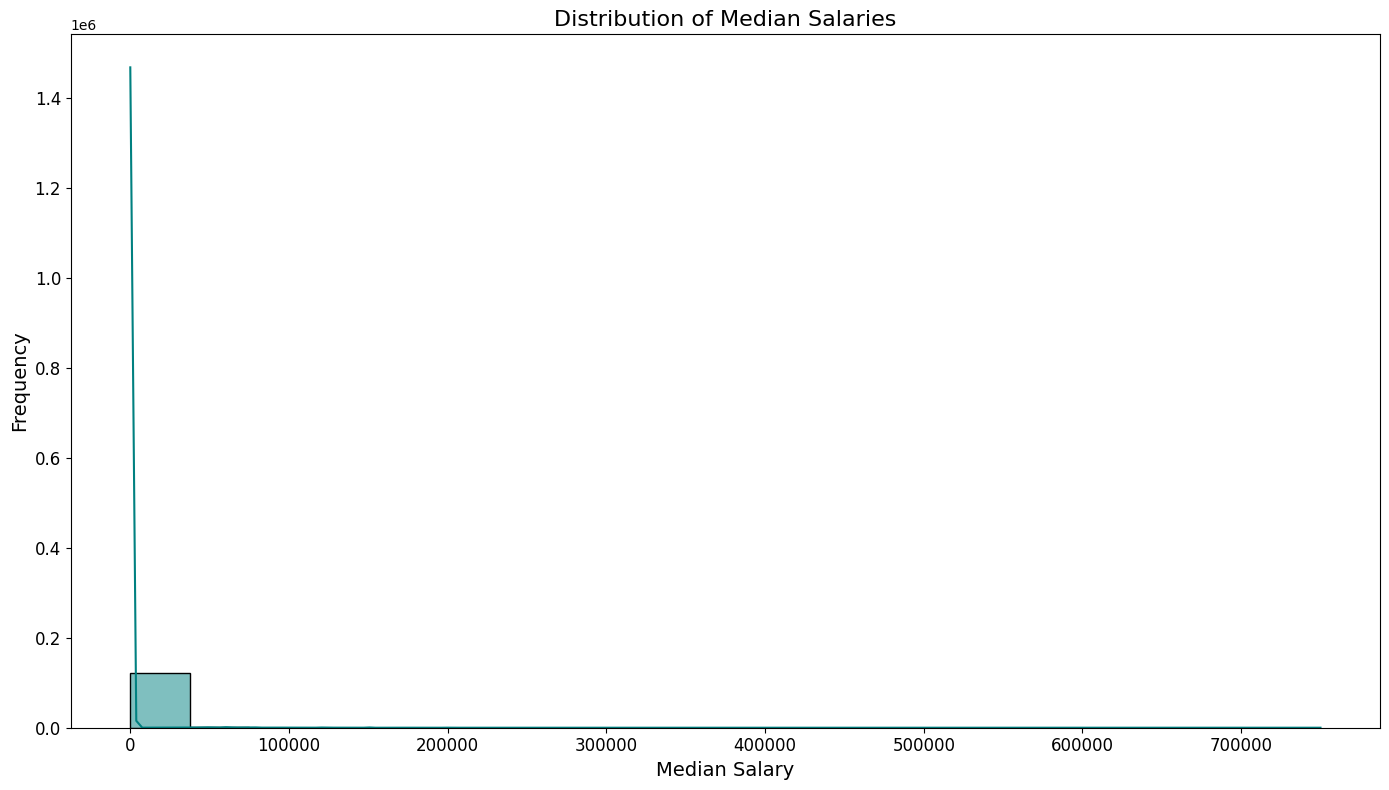

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of median salaries
plt.figure(figsize=(14, 8))
sns.histplot(postings['med_salary'].dropna(), kde=True, bins=20, color='teal')
plt.title('Distribution of Median Salaries', fontsize=16)
plt.xlabel('Median Salary', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


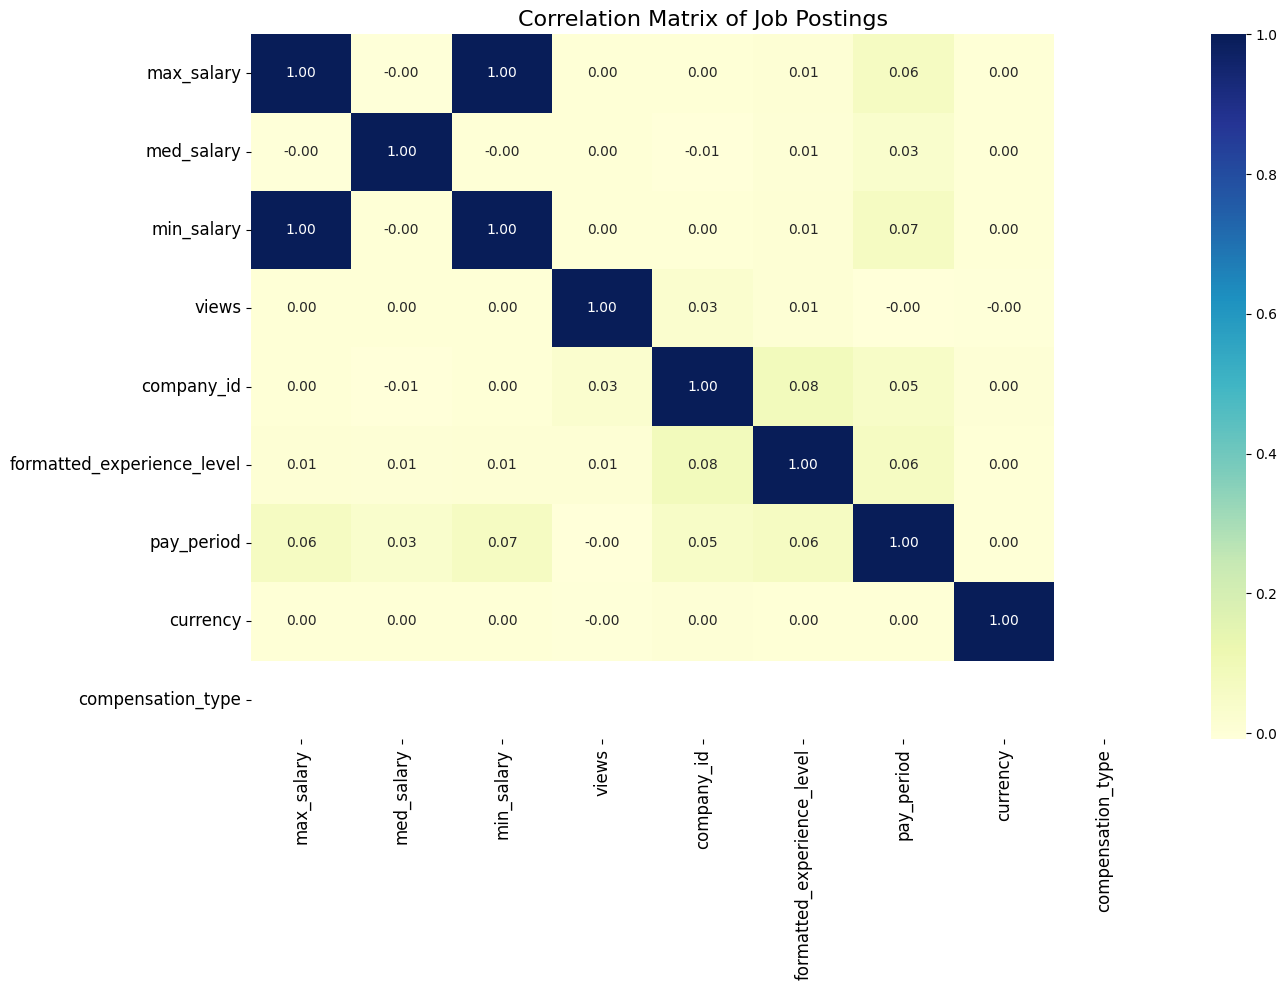

In [34]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Convert categorical columns to numeric
categorical_columns = ['pay_period', 'formatted_experience_level', 'currency', 'compensation_type']
for column in categorical_columns:
    postings[column] = label_encoder.fit_transform(postings[column].astype(str))

# Select numeric columns for correlation
numeric_columns = ['max_salary', 'med_salary', 'min_salary', 'views', 'company_id', 'formatted_experience_level', 'pay_period', 'currency', 'compensation_type']

# Create a correlation matrix
corr_matrix = postings[numeric_columns].corr()

# Generate a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Matrix of Job Postings', fontsize=16)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


In [35]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import pandas as pd

# Define categorical features to be one-hot encoded
cat_features = ['pay_period', 'formatted_experience_level', 'currency', 'compensation_type']
onehot_encoder = OneHotEncoder()

# One-hot encode categorical features
encoded_categorical = onehot_encoder.fit_transform(postings[cat_features])

# Convert the sparse matrix to a DataFrame
encoded_categorical_df = pd.DataFrame(encoded_categorical.toarray(), columns=onehot_encoder.get_feature_names_out(cat_features))

# Combine numeric and encoded categorical features
num_features_df = postings[['max_salary', 'med_salary', 'min_salary', 'views', 'company_id']]
combined_features = pd.concat([num_features_df.reset_index(drop=True), encoded_categorical_df], axis=1)

# Define the target variable (assuming a binary classification task)
# Example target variable: whether the number of applies is above the median
target_variable = (postings['applies'] > postings['applies'].median()).astype(int)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(combined_features, target_variable, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f"Training Features Shape: {X_train.shape}")
print(f"Test Features Shape: {X_test.shape}")
print(f"Training Labels Shape: {y_train.shape}")
print(f"Test Labels Shape: {y_test.shape}")


Training Features Shape: (97704, 22)
Test Features Shape: (24426, 22)
Training Labels Shape: (97704,)
Test Labels Shape: (24426,)


In [36]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = xgb_model.predict(X_test)

# Evaluate the model
model_accuracy = accuracy_score(y_test, predictions)
print(f'Model Accuracy: {model_accuracy:.2f}')

# Print a detailed classification report
report = classification_report(y_test, predictions)
print('Classification Report:\n', report)


Model Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     22430
           1       0.81      0.78      0.79      1996

    accuracy                           0.97     24426
   macro avg       0.89      0.88      0.89     24426
weighted avg       0.97      0.97      0.97     24426



In [38]:
!pip install shap


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 4.1 MB/s eta 0:00:00


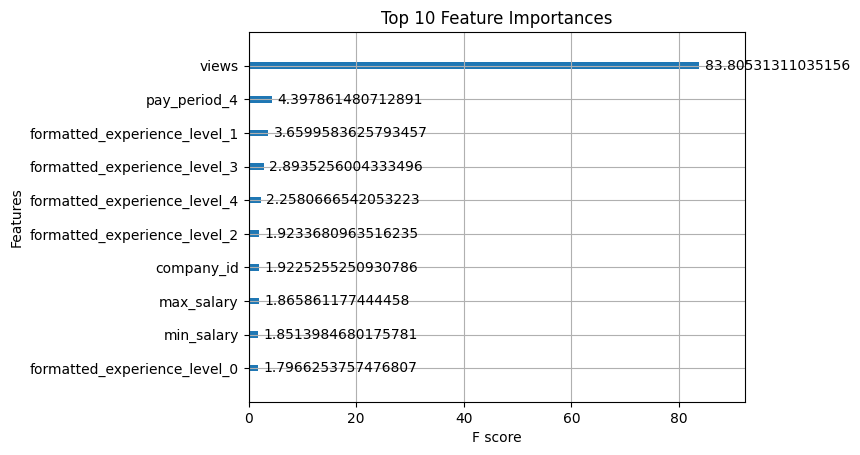

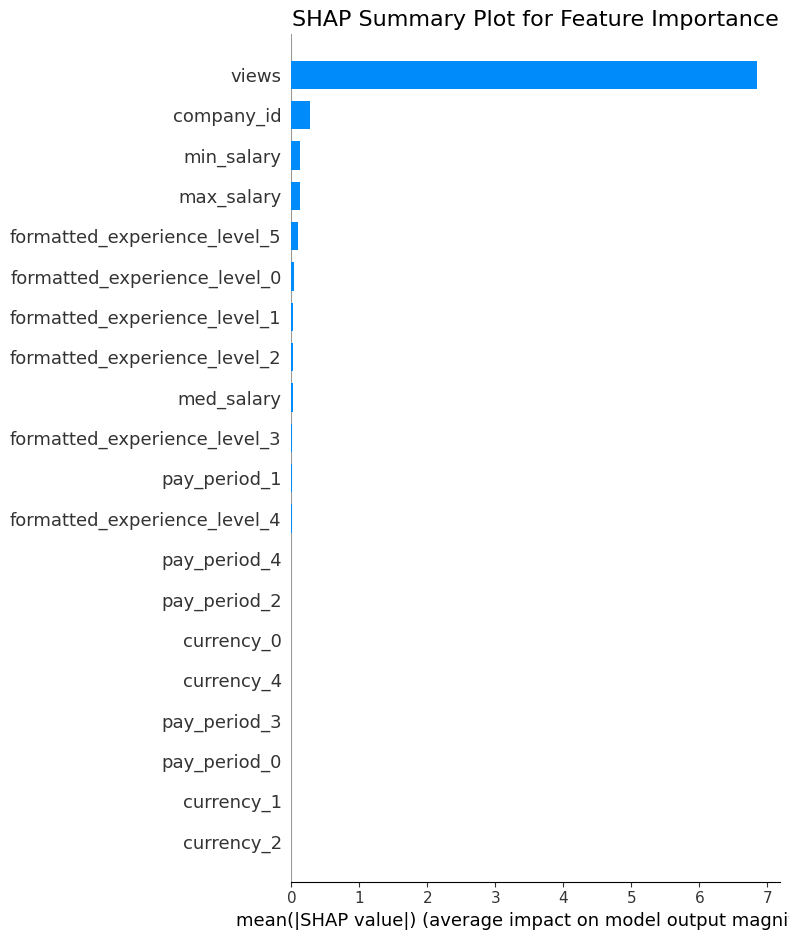

In [39]:
import matplotlib.pyplot as plt
import shap

# Plot feature importance using XGBoost's built-in function
xgb.plot_importance(xgb_model, importance_type='gain', max_num_features=10, title='Top 10 Feature Importances')
plt.show()

# SHAP values for interpretability
shap_explainer = shap.Explainer(xgb_model)
shap_values = shap_explainer(X_test)

# SHAP summary plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title('SHAP Summary Plot for Feature Importance', fontsize=16)
plt.tight_layout()
plt.show()


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     22430
           1       0.81      0.78      0.79      1996

    accuracy                           0.97     24426
   macro avg       0.89      0.88      0.89     24426
weighted avg       0.97      0.97      0.97     24426



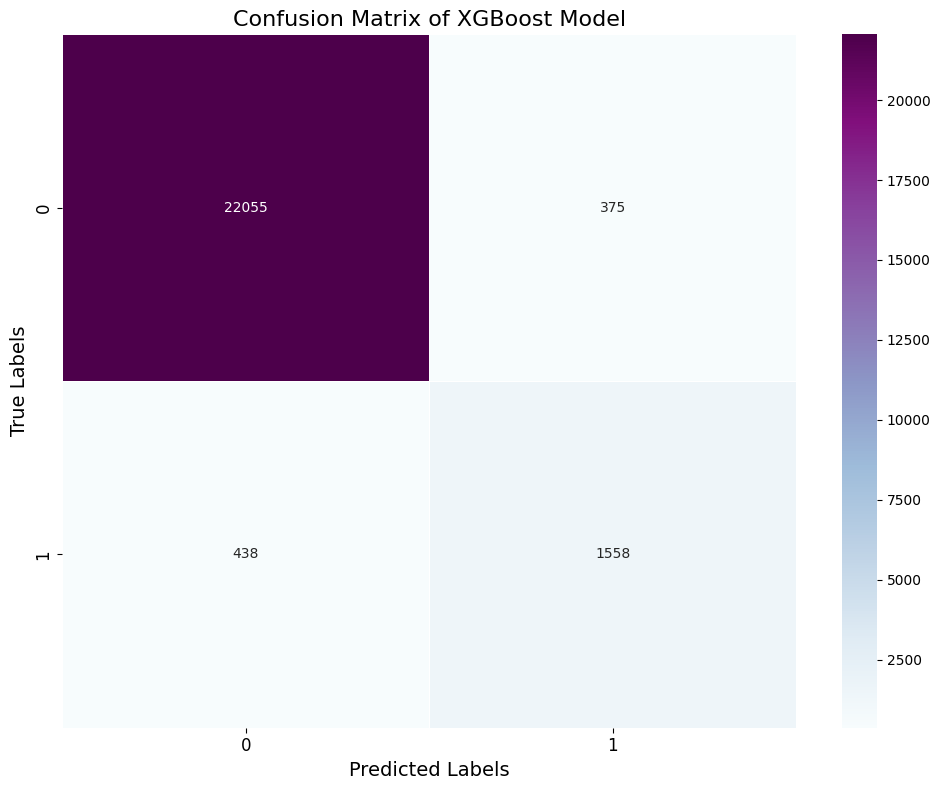

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate classification report
class_report = classification_report(y_test, predictions)
print('Classification Report:\n', class_report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuPu', linewidths=.5)
plt.title('Confusion Matrix of XGBoost Model', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


In [41]:
import pickle

# Save the trained XGBoost model to a file using pickle
model_filename = 'trained_xgboost_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(xgb_model, file)

# Print a confirmation message
print(f"Model saved to {model_filename}")


Model saved to trained_xgboost_model.pkl


In [42]:
def recommend_jobs(user_profile, model, tfidf_vectorizer, onehot_encoder, job_postings, top_n=5):
    # Process user profile using TF-IDF
    user_tfidf_vector = tfidf_vectorizer.transform([user_profile['description']])
    user_tfidf_df = pd.DataFrame(user_tfidf_vector.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

    # Encode categorical features of the user profile
    user_categorical_features = pd.DataFrame({
        'pay_period': [user_profile['pay_period']],
        'experience_level': [user_profile['experience_level']],
        'currency': [user_profile['currency']],
        'compensation_type': [user_profile['compensation_type']]
    })
    user_categorical_encoded = onehot_encoder.transform(user_categorical_features)
    user_categorical_encoded_df = pd.DataFrame(user_categorical_encoded.toarray(), columns=onehot_encoder.get_feature_names_out())

    # Prepare combined features for job prediction
    recommendations = []
    for idx, job in job_postings.iterrows():
        job_numeric_features = pd.DataFrame({
            'max_salary': [job['max_salary']],
            'med_salary': [job['med_salary']],
            'min_salary': [job['min_salary']],
            'views': [job['views']],
            'company_id': [job['company_id']]
        })
        combined_features = pd.concat([job_numeric_features.reset_index(drop=True), user_categorical_encoded_df, user_tfidf_df], axis=1)
        job_score = model.predict_proba(combined_features)[:, 1][0]  # Assuming the second column is the probability of interest
        recommendations.append((idx, job_score))

    # Combine predictions with job postings
    job_postings['prediction_score'] = [score for _, score in recommendations]

    # Sort and select top N job recommendations
    top_recommendations = job_postings.sort_values(by='prediction_score', ascending=False).head(top_n)

    return top_recommendations
